In [ ]:
first_name= "Hesam"
last_name= "Hosseini"
student_number= "400101034"

### Decision tree

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
 الگوریتم ساخت درخت تصمیم به صورت زیر میباشد:
<ol>
<li>
یک ویژگی انتخاب می شود و داده‌ها بر اساس یک شرط روی آن ویژگی تقسیم می‌شوند. بهترین ویژگی، ویژگی‌ای است که داده‌ها را به بهترین شکل تقسیم می‌کند.
</font></div>

<div align=right>
<font face="B Nazanin" size=5>
<p></p>
<b><i>
 ID3 الگوریتم
</i></b>
</font></div>
<p></p>
<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
در ادامه‌ی این نوشته به بررسی الگوریتم ID3 که یک الگوریتم پایه‌ای برای ساخت درخت تصمیم است می‌پردازیم.
<h3>بهره‌ی اطلاعاتی</h3>
 برای تعیین رسیدن به برگ‌های درخت نیاز به بررسی این موضوع داریم که آیا داده‌های یک گره به‌اندازه‌ی کافی یکدست شده‌اند یا خیر. در الگوریتم ID3 برای این کار از معیار بهره‌ی اطلاعاتی استفاده می‌شود.
برای تعریف بهره‌ی اطلاعاتی ابتدا انتروپی را تعریف می‌کنیم.
<br>
انتروپی یک معیار عددی برای اندازه‌گیری اطلاعات یا تصادفی بودن یک متغیر تصادفی است. این معیار به صورت زیر تعریف می‌شود:
</font></div>

$H(X) := -\sum_{x \in \mathcal{x}} P(x)\; logP(x) = \mathbb{E}[-logP(x)]$

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
در مسئله‌ی دسته‌بندی دو کلاسه می‌توانیم احتمال انتساب داده به هر کلاس را با توزیع برنولی مدل کنیم. در این صورت خواهیم داشت:
</font></div>

$H(x):= -P_+\; logP_+ - P_-\; logP_-$

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
نمودار زیر این تابع را بر حسب احتمال انتساب به ‌دسته‌ی مثبت نشان می‌دهد.
</font></div>

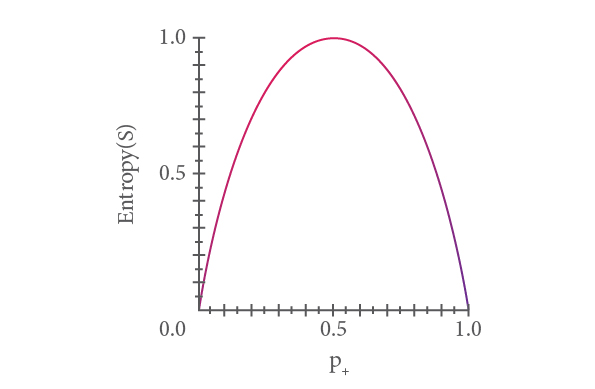

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
هر چه مقدار انتروپی بیشتر باشد ابهام درباره‌ی متغیر تصادفی بیشتر است. در مثال  بالا بیشینه‌ی انتروپی بازای مقدار احتمال ۰.۵ (مثلا یک سکه‌ی متوازن) رخ می‌دهد. هر چقدر به احتمال‌های ۰ یا ۱ نزدیک شویم (سکه نامتوازن‌تر شود) مقدار ابهام کم می‌شود.
<br>
بنابراین طبق آن‌چه گفته شد انتروپی به طور شهودی ابهام موجود در توزیع داده‌ها را به ما نشان‌ می‌دهد. از طرف دیگر اشاره شد که هنگام ساختن گره‌ها باید ویژگی‌ای انتخاب شود که دسته‌بندی داده‌ها براساس آن بیشترین یکدستی را در دسته‌های تولید شده، ایجاد کند. بنابراین یک معیار می‌تواند این باشد که این دسته‌بندی چقدر از انتروپی موجود در داده‌ها کاسته است. به این مقدار بهره‌ی اطلاعاتی گفته می‌شود.
</font></div>

$Gain(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{S} Entropy(S_v)$

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
که در رابطه‌ی بالا S
مجموعه‌ی داده‌ها در گره قبل از تقسیم‌بندی است، A
ویژگی‌ای است که بر اساس آن داده‌ها تقسیم‌بندی می‌شوند.  Values(A)
مقادیر مختلفی است که ویژگی A
می‌تواند داشته باشد و
$S_v$
زیرمجموعه‌ای از S است که ویژگی A در آنها برابر با $v$ است.
<br>

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV

حال در زیر توابع لازم از جمله آنتروپی و بهره اطلاعاتی را تکمیل کنید.
از این توابع در تعریف کردن مدل یادگیری و انتخاب بهترین ویژگی استفاده خواهیم کرد.

In [ ]:
# (10 Points)
def entropy(y: pd.Series):
    """
    return the entropy of input
    """
    ########## [Your Code] ##########
    value_counts = y.value_counts(normalize=True)
    entropy = -np.sum(value_counts * np.log2(value_counts))

    return entropy

def information_gain(x: pd.Series, y: pd.Series):
    """
    return the information gain of x
    """
    ########## [Your Code] ##########
    entropy_y = entropy(y)
    value_counts_x = x.value_counts(normalize=True)
    entropy_x = np.sum([value_counts_x[x_val] * entropy(y[x == x_val]) for x_val in value_counts_x.index])
    info_gain = entropy_y - entropy_x

    return info_gain
def information_gains(X: pd.DataFrame, y: pd.Series):
    """
    return the information gain of all features
    """
    ########## [Your Code] ##########
    info_gains = {}
    for col in X.columns:
        info_gains[col] = information_gain(X[col], y)

    return info_gains
def information_gain_continues(x: pd.Series, y: pd.Series,trsh):
    """
    return the information gain of x
    """
    ########## [Your Code] ##########
    entropy_y = entropy(y)
    # print(entropy_y)
    first = y[x <= trsh]
    second = y[x > trsh]

    entropy_x = (len(first)/len(y))*entropy(first) + (len(second)/len(y))*entropy(second)

    return  entropy_y - entropy_x


def information_gains_continues(X: pd.DataFrame, y: pd.Series):
    max_info = 0
    bes_col = None
    tresh = None
    for col in X.columns :
        unique_values = X[col].unique()
        mid = np.median(unique_values)

        gain = information_gain_continues(X[col] , y , mid )
        if gain >= max_info:
          max_info = gain
          bes_col = col
          tresh = mid

    return bes_col , tresh ,max_info

<div dir=rtl>
حال در زیر کلاس Node  را تعریف میکنیم که  بیس اصلی مدل ما را تشکیل میدهد .

با استفاده از توابعی که در قسمت قبل نوشتید مدل یادگیری خود را کامل کنید.

In [ ]:
# you can add any variable or function to class if you need.
class Node:
    def __init__(self, max_depth):
      # Each node in the tree is an instance of class `Node` which is capable of predicting and fitting.
        self.max_depth = max_depth
        self.best_feature = ''
        self.children = []
        self.threashold = None
        self.choice = None


    def _is_leaf(self):
        return len(self.children) == 0

    def fit(self, X_train, y_train):
        # print('fds')
        """
        learn the best_feature and create the children of this node
        - In the `fit` function this node gets features and labels from its father and using information gain decides which feature to use.
         Also based on the decided class it will create its children and call their fit function passing relevant features and labels.
        """
        ########## [Your Code] ##########
        # Check if the node is a leaf node

        if  len(set(y_train.to_numpy().reshape(-1)))<= 1:
          # print(set(y_train))
          count = y_train.value_counts()
          self.choice = (count).idxmax()
          # print(count)
          # print(self.choice)
          return

        # Find the feature with the highest information gain
        feature , threshold , max_info_gain  = information_gains_continues(X_train, y_train)
        # print(feature)
        # = max(info_gains, key=info_gains.get)
        # print(best_feature)
        self.threashold = threshold
        self.best_feature = feature
        # print(feature)
        X_col = X_train[feature]
        unique_vals = X_col.unique()


        X_child1 = X_train[X_col <= threshold]
        y_child1 = y_train[X_col <= threshold]

        child1 = Node(self.max_depth - 1)
        # child1.threshold = val
        # count = y_child1.value_counts()
        # print(count)
        # print((count))
        # child1.choice = (count).idxmax()
        self.children.append(child1)
        child1.fit(X_child1, y_child1)


        X_child2 = X_train[X_col > threshold]
        y_child2 = y_train[X_col > threshold]

        child2 = Node(self.max_depth - 1)
        # child2.threshold = val
        # count = y_child2.value_counts()
        # print(count)
        # print((count))
        # child2.choice = (count).idxmax()
        self.children.append(child2)
        child2.fit(X_child2, y_child2)


    def predict(self, X):
        """
        predicte the class of X based on this node best_feature
        - In the `predict` function this node gets features as input and based on its best_feature decides on this input. If this node is a leaf,
         it will return the decision imediatly and if it's not a leaf, it will return the prediction of its decided child.
        """
        ########## [Your Code] ##########
        if self._is_leaf():
            return self.choice
        val = X[self.best_feature]
        # print(val)
        if val <= self.threashold:
            return self.children[0].predict(X)
        else:
            return self.children[1].predict(X)

## simple test for categorical data_set

In [ ]:
sunny = 'Sunny'
Overcast = 'Overcast'
Rain = 'Rain'
Hot = 'Hot'
mild = 'Mild'
cool = 'Cool'
High = 'High'
Normal = 'Normal'
Weak = 'Weak'
Strong = 'Strong'
df = pd.DataFrame({
    # 'Day' : list(range(1,15)),
    'Outlook' : [sunny, sunny, Overcast, Rain, Rain, Rain, Overcast, sunny, sunny, Rain, sunny, Overcast, Overcast ,Rain],
    'Temp' : [Hot, Hot, Hot, mild, cool, cool, cool, mild, cool, mild, mild, mild, Hot, mild],
    'Humidity' : [High, High, High, High, Normal, Normal, Normal, High, Normal, Normal, Normal, High, Normal, High],
    'Wind' : [Weak, Strong, Weak, Weak, Weak, Strong, Strong, Weak, Weak, Weak, Strong, Strong, Weak ,Strong],
    'Target' : [0 ,0 ,1 ,1 ,1 ,0 ,1 ,0 ,1 ,1 ,1 ,1 ,1 ,0 ]
})
df

,Outlook,Temp,Humidity,Wind,Target
0,Sunny,Hot,High,Weak,0
1,Sunny,Hot,High,Strong,0
2,Overcast,Hot,High,Weak,1
3,Rain,Mild,High,Weak,1
4,Rain,Cool,Normal,Weak,1
5,Rain,Cool,Normal,Strong,0
6,Overcast,Cool,Normal,Strong,1
7,Sunny,Mild,High,Weak,0
8,Sunny,Cool,Normal,Weak,1
9,Rain,Mild,Normal,Weak,1


In [ ]:
entropy(df['Target'])

0.9402859586706311

In [ ]:
information_gain(df['Target'],df['Outlook'])

0.24674981977443933

$$
\begin{array}{lc}
S=[9+, 5-] & \text { Entropy }(S)=-\frac{9}{14} \log _2 \frac{9}{14}-\frac{5}{14} \log _2 \frac{5}{14}=0.94 \\
S_{\text {Sunn }} \leftarrow[2+, 3-] & \text { Entropy }\left(S_{\text {Sunny }}\right)=-\frac{2}{5} \log _2 \frac{2}{5}-\frac{3}{5} \log _2 \frac{3}{5}=0.971 \\
S_{\text {Overcast }} \leftarrow[4+, 0-] & \text { Entropy }\left(S_{\text {Overcast }}\right)=-\frac{4}{4} \log _2 \frac{4}{4}-\frac{0}{4} \log _2 \frac{0}{4}=0 \\
S_{\text {Rain }} \leftarrow[3+, 2-] & \text { Entropy }\left(S_{\text {Rain }}\right)=-\frac{3}{5} \log _2 \frac{3}{5}-\frac{2}{5} \log _2 \frac{2}{5}=0.971 \\
\text { Gain }(S, \text { Outlook })=\text { Entropy }(S)-\sum_{v \in\{\text { Sunny,Overcast }, \text { Rain }\}} \frac{|S|}{|S|} \text { Entropy }\left(S_v\right) \\
\text { Gain }(S, \text { Outlook }) \\
=\text { Entropy }(S)-\frac{5}{14} \text { Entropy }\left(S_{\text {Sunny }}\right)-\frac{4}{14} \text { Entropy }\left(S_{\text {Overcast }}\right) \\
\quad-\frac{5}{14} \text { Entropy }\left(S_{\text {Rain }}\right) \\
\text { Gain }(S, \text { Outlook })=0.94-\frac{5}{14} 0.971-\frac{4}{14} 0-\frac{5}{14} 0.971=0.2464
\end{array}
$$

In [ ]:
info_gains = information_gains(df,df['Target'])
print(info_gains)
best_feature = max(info_gains, key=info_gains.get)
print(best_feature)

{'Outlook': 0.24674981977443933, 'Temp': 0.02922256565895487, 'Humidity': 0.15183550136234159, 'Wind': 0.04812703040826949}
Outlook


test

In [ ]:
X = df.iloc[:,:-1]

In [ ]:
node = Node(20)
node.fit(X,df['Target'])

fds
Outlook
fds
Outlook
fds
fds
fds
fds
Outlook
fds
fds


In [ ]:
node.predict(X.iloc[0,:])

0

In [ ]:
i = 0
for index, row in df.iterrows():
    per = node.predict(row)
    if per == df.iloc[index,-1]:
      i+=1

In [ ]:
accurecy = i/len(df.index)
print(f'Test Accuracy on Train data is {accurecy*100}%')


Test Accuracy on Train data is 100.0%


###Training & Testing

<div dir=rtl>
حال دیتا ست mnist  را لود کنید و با مدل خود لرن کنید و دقت یادگیری را گزارش دهید.


In [ ]:
#####################################
#            Your Code              #
#####################################
from keras.datasets import mnist
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
# data = pd.read_csv('diabetes.csv')
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,:-1].to_numpy(), data['Outcome'].to_numpy(), train_size=0.7, random_state=30)


#reshape data from 28*28 matrix to 784 array
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)

# scale data to [0 ,1]
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
# y_train_scaled = y_train/y_train.max()
x_test = scaler.transform(x_test)

# initializing the pca

# implement pca on our data with 10 component
# select 10 components for train and test data
pca = PCA(n_components=10)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)


#convert reduced datasets types to dataframe using pd
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)
# x_train.value_counts()

In [ ]:
x_train.iloc[:,100].value_counts()

0.000000    54889
0.992157      414
0.996078      363
1.000000      306
0.988235      124
            ...  
0.466667        5
0.662745        5
0.486275        5
0.290196        4
0.211765        3
Name: 100, Length: 256, dtype: int64

In [ ]:
#################################
#   train dt on you train set   #
#          Your Code            #
#################################
dt = Node(0)
dt.fit(x_train,y_train)

In [174]:
#############################
#   report model accuracy   #
#        Your Code          #
#############################

i = 0
confustion = np.zeros((10,10),dtype=int)
for index, row in x_test.iterrows():
    per = dt.predict(row)[0]
    if per == y_test.iloc[index,-1]:
      i+=1
    confustion[per,y_test.iloc[index,-1]]+=1

In [175]:
accurecy = i/len(y_test.index)
print(f'Test Accuracy on Train data is {accurecy*100}%')

Test Accuracy on Train data is 81.84%


In [176]:
confustion

array([[ 848,    0,   16,   12,    8,   44,   27,    3,    9,    7],
       [   1, 1095,    7,    4,    4,    3,    1,   13,    6,    4],
       [  22,    2,  890,   20,   16,   13,   14,   28,   42,    5],
       [  13,    7,   17,  788,    5,   45,    4,   14,   96,   15],
       [   4,    1,   14,    6,  736,    7,   26,   20,    9,  139],
       [  47,    0,   13,   56,   10,  663,   21,    2,   50,   18],
       [  25,   11,   16,    7,   15,   19,  844,    4,   10,    9],
       [   2,    8,   15,   14,   16,   12,    1,  871,   15,   55],
       [  10,    9,   41,   77,   18,   68,    8,   16,  714,   22],
       [   8,    2,    3,   26,  154,   18,   12,   57,   23,  735]])